#**M3 Lead Qualification Dataset**



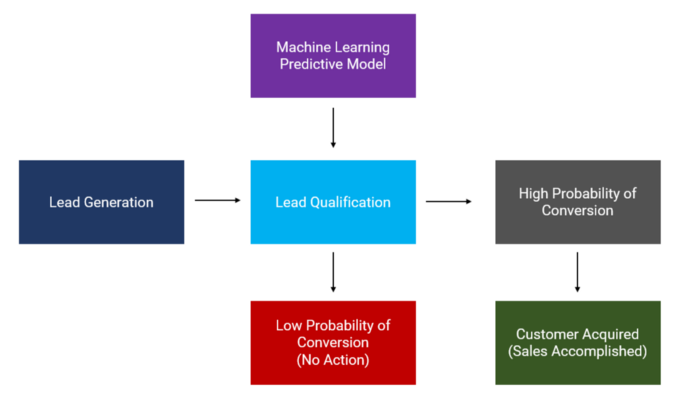

Source: https://towardsdatascience.com/predict-lead-score-the-right-way-using-pycaret-332faa780cfc Fair use claimed.

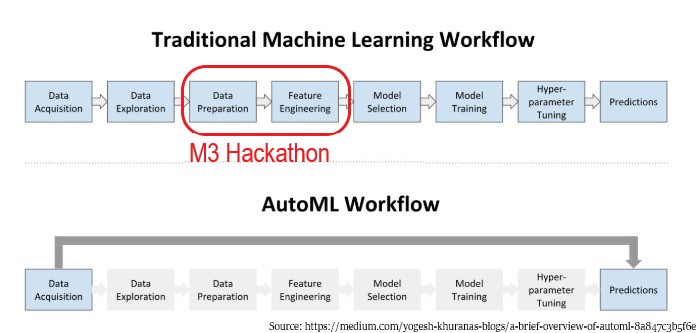

#**Table of Contents**
* Business Problem
* Executive Summary (BLUF)
* Conclusions from EDA Notebook
* Libraries
* Data
* Confirm No Duplicates & Resolve Missing Value Issues 
* Encodings
* Skewness Correction for Quant Variables
* Outliers
* Balance of Target
* Strength of Predictors
* Conclusions

#**Business Problem**
he business problem for this notebook is to execute data preprocessing requirements on the lead qualification data set, and, if possible, identify strong predictors.

#**Executive Summary (BLUF)**
This is a messy dataset. Some of the many details that required attention are:
*   No duplicates.
*   Resolved missing values by deleting features with a high number of NaNs, features with an highly dominant value, and by using median imputation for features with a small number of missing values.
*   Resolved missing values in the 'City' feature by treating NaN's there as a special category. 
*   Consilidated infrequent values in remaining features into an "Other" category.
*   One-hot encoded categorical features.
*   Trimmed outliers (5%, 95%), and this resolved skewness concerns also.
*   Principal components analysis does not appear useful as the first component explains less than 10% of the variance, and then a multitude of components explain 1-5% of the variance.
*   The following features were identified as important using RFE: ['Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Lead Quality_Might be',
       'Lead Quality_Not Sure', 'Last Notable Activity_SMS Sent']
* Try models built using original, oversampled (SMOTE) and undersampled data 

#**Conclusions from EDA  Notebook**

*   Many features have missing values, and some have a majority of instances with missing values
*   There are no duplicates
*   One-hot encoding needed for categorical features, but the categories that are infrequently encountered need to be bucketed first
*   The target ('Converted') is unbalanced (38.54%)
*   Many features have a dominant value and can likely be deleted
*   Quant variables can be trimmed to address outlier issue

#**Libraries**

In [ ]:
# Basic Libraries
import pandas as pd
import seaborn as sns

import numpy as np
from numpy import mean
from numpy import std

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy.stats.mstats import winsorize
import scipy.stats as ss
import math

In [ ]:
# sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
!pip install psynlig 
from psynlig import pca_explained_variance_bar
plt.style.use('seaborn-talk')


#**Data**

The data was sourced from here: https://www.kaggle.com/code/ashydv/lead-scoring-logistic-regression/comments

Data dictionary:
The features re not well documented in hte source, but are mostlyu eself explanatory and deal with the source of the lead, how long the prospect has spent on activities on the website
* Lead Number (Delete)
* Lead Origin (Categorical)
* Lead Source (Categorical)
* Do Not Email (Categorical)
* Do Not Call (Categorical)
* TotalVisits (Quantitative)
* Total Time Spent on Website (Quantitative)
* Page Views Per Visit (Quantitative)
* Last Activity (Categorical)
* Country (Categorical)
* Specialization (Categorical)
* How did you hear about X Education (Categorical)
* What is your current occupation (Categorical)
* What matters most to you in choosing a course (Categorical)
* Search (Categorical)
* Magazine (Categorical)
* Newspaper Article (Categorical)
* X Education Forums (Categorical)
* Newspaper (Categorical)
* Digital Advertisement (Categorical)
* Through Recommendations (Categorical)
* Receive More Updates About Our Courses (Categorical)
* Tags (Categorical)
* Lead Quality (Quantitative)
* Update me on Supply Chain Content (Categorical))
* Get updates on DM Content (Categorical)
* Lead Profile (Categorical)
* City (Categorical)
* Asymmetrique Activity Index (Quantitative)
* Asymmetrique Profile Index (Quantitative)
* Asymmetrique Activity Score (Quantitative)
* Asymmetrique Profile Score (Quantitative)
* I agree to pay the amount through cheque (Categorical)
* A free copy of Mastering The Interview (Categorical)
* Last Notable Activity (Categorical)
* Converted (whether the lead converted - this is the target variable)

In [ ]:
# Read Data
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

# Read 
file_ = "drive/My Drive/Colab Notebooks/Big Data ML/New BDML/Data/Marketing_Leads_India.csv"   # adapt this as needed to the file structure on your Google drive
df = pd.read_csv(file_) # read in csv file

Mounted at /content/drive


In [ ]:
# Ensure maximum display for pandas
pd.set_option('display.max_columns', None)

# Shape of df
print("Shape", df.shape)

# Check data types
print(df.info())

# Head  tail of df
print(df.head())
print(df.tail())

Shape (9240, 36)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 36 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9240 non-null   int64  
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                      

#**Confirm No Duplicates & Resolve Missing Value Issues**

In [ ]:
# Check for duplicates
print('\n Duplicates:',df.duplicated().sum())


 Duplicates: 0




Missing Values
 Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                             0
Specialization                                      0
How did you hear about X Education               7250
What is your current occupation                     0
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Educatio

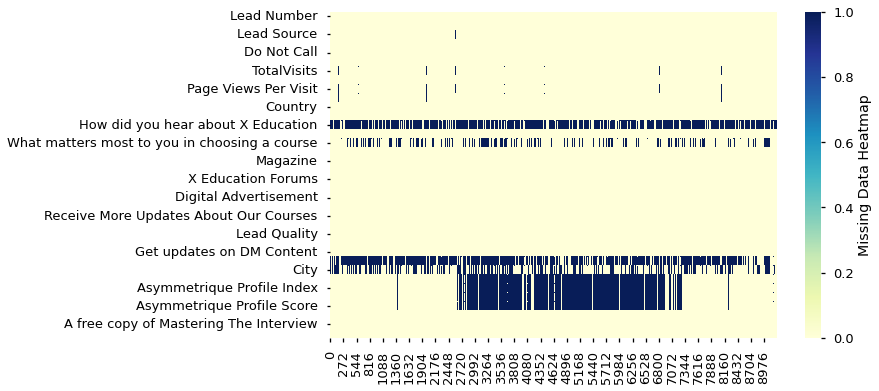

In [ ]:
# Check for missing values
print('\n\nMissing Values\n',df.isnull().sum(axis=0))

# Missing value heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data Heatmap'})
plt.show()

In [ ]:
# Delete 'Lead Number' as it is an index
if 'Lead Number' in df.columns:
  df = df.drop(['Lead Number'],axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


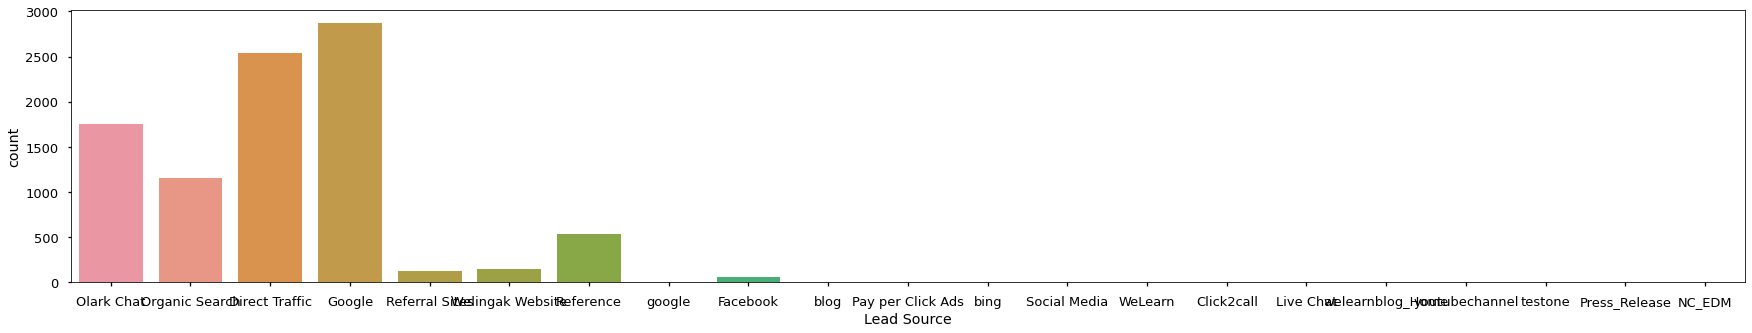

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


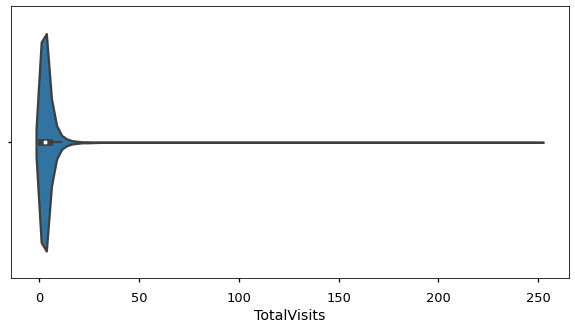

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


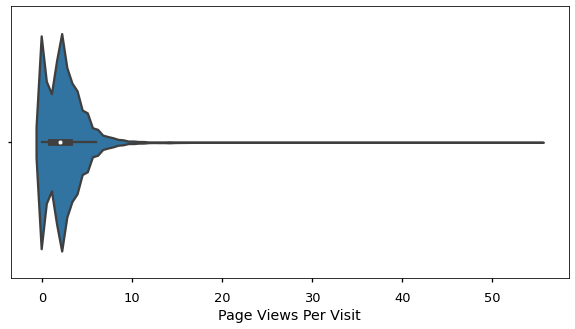

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


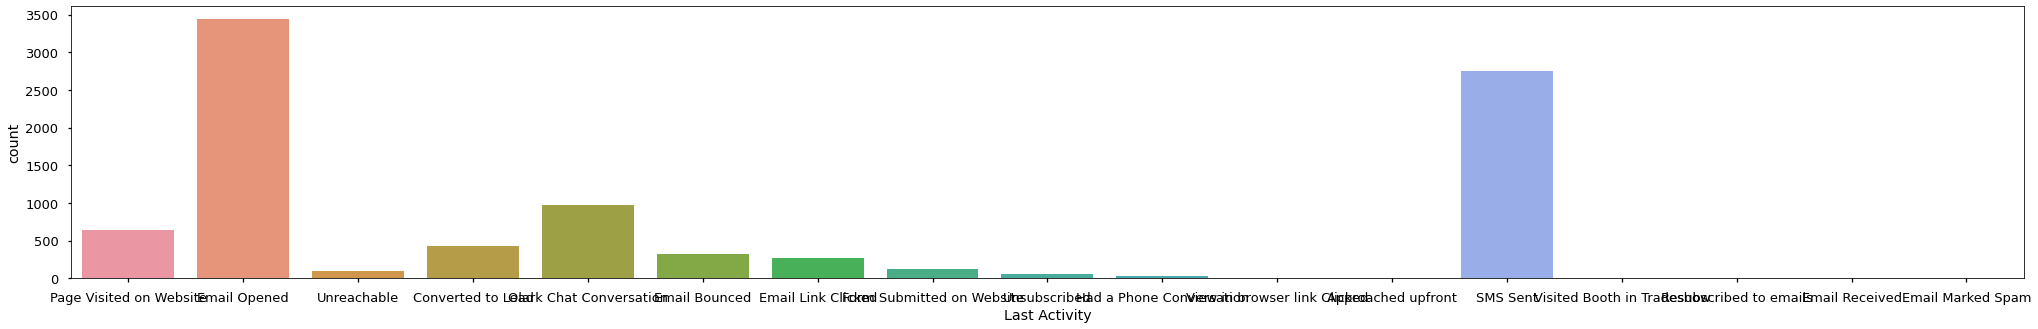

In [ ]:
# Assess features with a small number of missing values and use median imputation
# i.e., impute 'Lead Source', 'TotalVisits', 'Page Views Per Visit" and "Last Activity" using the median
plt.figure(figsize = (30,5))
sns.countplot(df['Lead Source'])
plt.show()

plt.figure(figsize = (10,5))
sns.violinplot(df['TotalVisits'])
plt.show()

plt.figure(figsize = (10,5))
sns.violinplot(df['Page Views Per Visit'])
plt.show()

plt.figure(figsize = (35,5))
sns.countplot(df['Last Activity'])
plt.show()

# Median for 'Lead Source' is Google; median for 'Last Activity' is 'Email Opened'

In [ ]:
# Correct NaN's in features with a small number of missing values
# Fixing NaNs in 'Lead Source'
print(df['Lead Source'].describe())
df['Lead Source'] = df['Lead Source'].replace(np.nan, 'Google')

# Fixing NaNs in 'TotalVisits'
print('\n\n',df['TotalVisits'].describe())
df['TotalVisits'] = df['TotalVisits'].replace(np.nan, 3)

# Fixing NaNs in 'Page Views Per Visit'
print('\n\n',df['Page Views Per Visit'].describe())
df['Page Views Per Visit'] = df['Page Views Per Visit'].replace(np.nan, 2)

# Fixing NaNs in 'Last Activity'
print('\n\n',df['Last Activity'].describe())
df['Last Activity'] = df['Last Activity'].replace(np.nan, 'Email Opened')

# Check for missing values
print('\n\nMissing Values\n',df.isnull().sum(axis=0))

count       9204
unique        21
top       Google
freq        2868
Name: Lead Source, dtype: object


 count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64


 count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64


 count             9137
unique              17
top       Email Opened
freq              3437
Name: Last Activity, dtype: object


Missing Values
 Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Ti

In [ ]:
# Treat NaNs in 'City' with "No City" label
df['City'] = df['City'].replace(np.NaN, "No City")

In [ ]:
# Delete features wih more than 50% NaNs: 'How did you hear about X Education', 'Lead Profile', 'Asymmetrique Activity Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Index', and 'Asymmetrique Profile Score' as there are too many missing values in those features
if 'How did you hear about X Education' in df.columns:
  df = df.drop(['How did you hear about X Education'],axis=1)
if 'Lead Profile' in df.columns:
  df = df.drop(['Lead Profile'],axis=1)
if 'Asymmetrique Activity Index' in df.columns:
  df = df.drop(['Asymmetrique Activity Index'],axis=1)
if 'Asymmetrique Activity Score' in df.columns:
  df = df.drop(['Asymmetrique Activity Score'],axis=1)
if 'Asymmetrique Profile Index' in df.columns:
  df = df.drop(['Asymmetrique Profile Index'],axis=1)
if 'Asymmetrique Profile Score' in df.columns:
  df = df.drop(['Asymmetrique Profile Score'],axis=1)
df.shape

(9240, 29)

In [ ]:
# Generate frequency tables to identify feature values that can be bucketed into an 'Other' category, and features with an extremely dominant value
for i in df.columns:
  print(i,'\n',df[i].value_counts(),'\n\n\n')

Lead Origin 
 Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64 



Lead Source 
 Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64 



Do Not Email 
 No     8506
Yes     734
Name: Do Not Email, dtype: int64 



Do Not Call 
 No     9238
Yes       2
Name: Do Not Call, dtype: int64 



Converted 
 0    5679
1    3561
Name: Conver

In [ ]:
# Consilidate rare values in selected features into "Other" category

# Lead Origin
df['Lead Origin'] = df['Lead Origin'].replace(['Quick Add Form'], 'Lead Add Form')

# Column: Lead Source
df['Lead Source'] = df['Lead Source'].replace(['google'], 'Google')
df['Lead Source'] = df['Lead Source'].replace(['bing', 'Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'blog', 'youtubechannel','testone', 'welearnblog_Home','Other'], 'Other')

# Column: What is your current occupation
df['What is your current occupation'] = df['What is your current occupation'].replace(['Housewife','Businessman','Other'], 'Other')

# Column: Last Activity
df['Last Activity'] = df['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation', 
                                                   'View in browser link Clicked','Visited Booth in Tradeshow', 'Approached upfront',
                                                   'Resubscribed to emails','Email Received', 'Email Marked Spam','Other'], 'Other')

#Column: Last Notable Activity
df['Last Notable Activity'] = df['Last Notable Activity'].replace(['Unsubscribed','Unreachable', 'Email Bounced', 'Unsubscribed' 'Unreachable', 'Had a Phone Conversation', 'Email Marked Spam',
                                  'Email Received', 'Form Submitted on Website', 'View in browser link Clicked', 
                                  'Resubscribed to emails', 'Approached upfront','Other'], 'Other')

# Column: Tags
df['Tags'] = df['Tags'].replace(['invalid number', 'wrong number given', 'In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized','Other'], 'Other')



In [ ]:
# Delete columns that have one extremely dominant value
if 'Get updates on DM Content ' in df.columns:
  df = df.drop(['Get updates on DM Content'],axis=1)
if 'I agree to pay the amount through cheque' in df.columns:
  df = df.drop(['I agree to pay the amount through cheque'],axis=1)
if 'Update me on Supply Chain Content' in df.columns:
  df = df.drop(['Update me on Supply Chain Content'],axis=1)
if 'Receive More Updates About Our Courses' in df.columns:
  df = df.drop(['Receive More Updates About Our Courses'],axis=1)
if 'Do Not Call' in df.columns:
  df = df.drop(['Do Not Call'],axis=1)
if 'Newspaper' in df.columns:
  df = df.drop(['Newspaper'],axis=1)
if 'Get updates on DM Content' in df.columns:
  df = df.drop(['Get updates on DM Content'],axis=1)
if 'Newspaper Article' in df.columns:
  df = df.drop(['Newspaper Article'],axis=1)
if 'Magazine' in df.columns:
  df = df.drop(['Magazine'],axis=1)
if 'Receive More Updates About Our Courses' in df.columns:
  df = df.drop(['Receive More Updates About Our Courses'],axis=1)
if 'What matters most to you in choosing a course' in df.columns:
  df = df.drop(['What matters most to you in choosing a course'],axis=1)  
if 'X Education Forum' in df.columns:
  df = df.drop(['X Education Forum'],axis=1)
if 'Search' in df.columns:
  df = df.drop(['Search'],axis=1)
if 'Through Recommendations' in df.columns:
  df = df.drop(['Through Recommendations'],axis=1)
if 'Digital Advertisement' in df.columns:
  df = df.drop(['Digital Advertisement'],axis=1) 
if 'X Education Forums' in df.columns:
  df = df.drop(['X Education Forums'],axis=1)
if 'Country' in df.columns:
  df = df.drop(['Country'],axis=1)

#**Encodings**

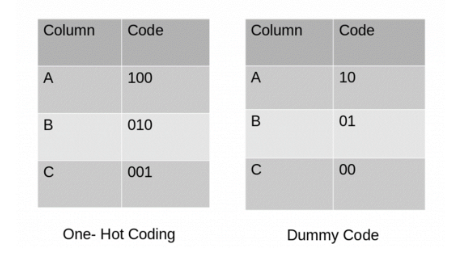

In [ ]:
# One-Hot Encode Categorical Variables (except 'City')
df = pd.get_dummies(data=df, columns=['Lead Origin', 'Lead Source', 'Do Not Email',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Tags', 'Lead Quality', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],drop_first=True)
  

#**Skewness Correction**

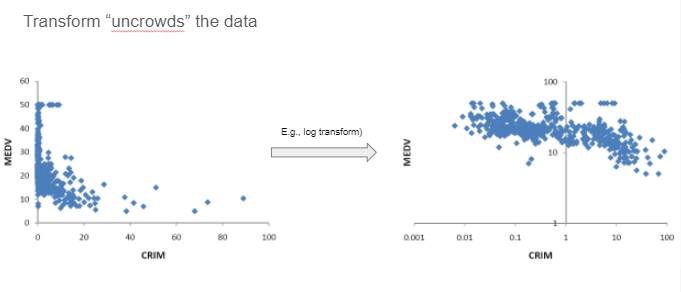

In [ ]:
# Code for skewness correction (see source below)
# Depending upon the characteritics of a feature (column), a log, Box-Cox or power transform is applied to normalize the distribution 

# -*- coding: utf-8 -*-
"""
Created on Sat Feb 23 14:42:46 2019
@author: DATAmadness
"""

##################################################
# A function that will accept a pandas dataframe
# and auto-transforms columns that exceeds threshold value
#  -  Offers choice between boxcox or log / exponential transformation
#  -  Automatically handles negative values
#  -  Auto recognizes positive /negative skewness

# Further documentation available here:
# https://datamadness.github.io/Skewness_Auto_Transform

def skew_autotransform(DF, include = None, exclude = None, plot = False, threshold = 1, exp = False):
    
    #Get list of column names that should be processed based on input parameters
    if include is None and exclude is None:
        colnames = DF.columns.values
    elif include is not None:
        colnames = include
    elif exclude is not None:
        colnames = [item for item in list(DF.columns.values) if item not in exclude]
    else:
        print('No columns to process!')
    
    #Helper function that checks if all values are positive
    def make_positive(series):
        minimum = np.amin(series)
        #If minimum is negative, offset all values by a constant to move all values to positive teritory
        if minimum <= 0:
            series = series + abs(minimum) + 0.01
        return series
    
    
    #Go through desired columns in DataFrame
    for col in colnames:
        #Get column skewness
        skew = DF[col].skew()
        transformed = True
        
        if plot:
            #Prep the plot of original data
            sns.set_style("darkgrid")
            sns.set_palette("Blues_r")
            fig, axes = plt.subplots(1, 2, figsize=(10, 5))
            #ax1 = sns.distplot(DF[col], ax=axes[0])
            ax1 = sns.histplot(DF[col], ax=axes[0], color="blue", label="100% Equities", kde=True, stat="density", linewidth=0)
            ax1.set(xlabel='Original ' + str(col))
        
        #If skewness is larger than threshold and positively skewed; If yes, apply appropriate transformation
        if abs(skew) > threshold and skew > 0:
            skewType = 'positive'
            #Make sure all values are positive
            DF[col] = make_positive(DF[col])
            
            if exp:
               #Apply log transformation 
               DF[col] = DF[col].apply(math.log)
            else:
                #Apply boxcox transformation
                DF[col] = ss.boxcox(DF[col])[0]
            skew_new = DF[col].skew()
         
        elif abs(skew) > threshold and skew < 0:
            skewType = 'negative'
            #Make sure all values are positive
            DF[col] = make_positive(DF[col])
            
            if exp:
               #Apply exp transformation 
               DF[col] = DF[col].pow(10)
            else:
                #Apply boxcox transformation
                DF[col] = ss.boxcox(DF[col])[0]
            skew_new = DF[col].skew()
        
        else:
            #Flag if no transformation was performed
            transformed = False
            skew_new = skew
        
        #Compare before and after if plot is True
        if plot:
            print('\n ------------------------------------------------------')     
            if transformed:
                print('\n %r had %r skewness of %2.2f' %(col, skewType, skew))
                print('\n Transformation yielded skewness of %2.2f' %(skew_new))
                sns.set_palette("Paired")
                #ax2 = sns.distplot(DF[col], ax=axes[1], color = 'r')
                ax2 = sns.histplot(DF[col], ax=axes[1], color="red", label="100% Equities", kde=True, stat="density", linewidth=0)
                ax2.set(xlabel='Transformed ' + str(col))
                plt.show()
            else:
                print('\n NO TRANSFORMATION APPLIED FOR %r . Skewness = %2.2f' %(col, skew))
                #ax2 = sns.distplot(DF[col], ax=axes[1])
                ax2 = sns.histplot(DF[col], ax=axes[1], color="blue", label="100% Equities", kde=True, stat="density", linewidth=0)
                ax2.set(xlabel='NO TRANSFORM ' + str(col))
                plt.show()
                

    return DF

In [ ]:
# Split features into X1 (quant features), X2 (qual features) and y (target)
# Identify predictors & target
X1 = df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
X2 = df.drop(['Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit'], axis=1)
y = df['Converted']


 ------------------------------------------------------

 'TotalVisits' had 'positive' skewness of 20.06

 Transformation yielded skewness of -0.34


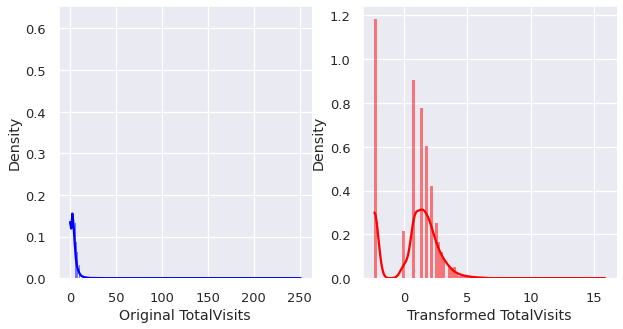


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'Total Time Spent on Website' . Skewness = 0.96


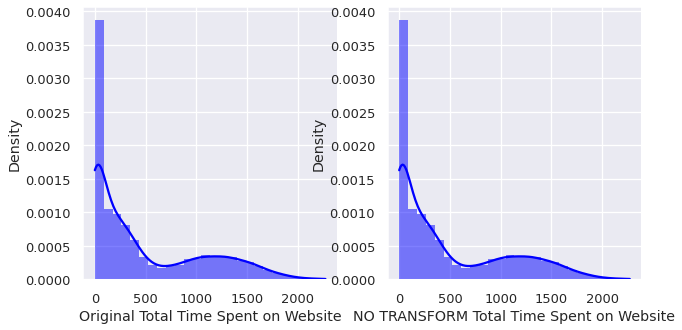


 ------------------------------------------------------

 'Page Views Per Visit' had 'positive' skewness of 2.90

 Transformation yielded skewness of -0.48


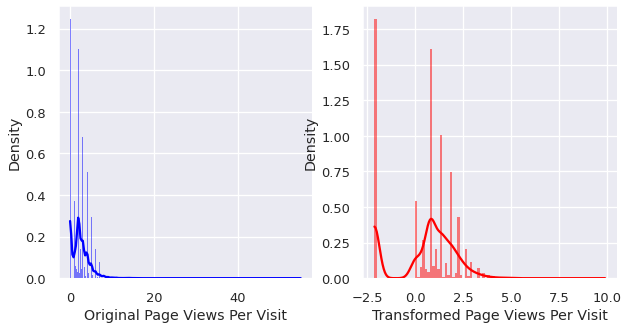

In [ ]:
# Use code above (adapted from https://github.com/datamadness/Automatic-skewness-transformation-for-Pandas-DataFrame) to correct skewness in quant fatures
X1 = skew_autotransform(X1.copy(deep=True), plot = True, exp = False, threshold = 1)

In [ ]:
# Concatenate X1 and X2
X = pd.concat([X1, X2], axis=1)

In [ ]:
# Record colnames and report basic descriptive statistics
col_names = X.columns
X.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_No City,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.745630,487.698268,0.484242,0.528788,0.077814,0.005952,0.005952,0.314827,0.189935,0.124892,0.002489,0.057792,0.013528,0.015368,0.079437,0.035281,0.028896,0.383117,0.012554,0.105303,0.022186,0.069264,0.297078,0.043615,0.006169,0.012121,0.105628,0.017208,0.012338,0.091775,0.039610,0.019264,0.090693,0.021970,0.054437,0.365801,0.010823,0.007900,0.004329,0.037771,0.021970,0.022727,0.897186,0.076407,0.020130,0.038745,0.012662,0.055519,0.018939,0.015693,0.044697,0.130195,0.587121,0.025974,0.063095,0.168831,0.634091,0.065043,0.397078,0.074242,0.049459,0.041126,0.081385,0.008009,0.312554,0.305952,0.368723,0.019805,0.017316,0.034416,0.235065
std,1.956603,548.021466,1.619684,0.499198,0.267893,0.076926,0.076926,0.464472,0.392271,0.330614,0.049832,0.233363,0.115527,0.123018,0.270435,0.184500,0.167524,0.486173,0.111346,0.306960,0.147297,0.253916,0.456996,0.204247,0.078304,0.109433,0.307377,0.130052,0.110394,0.288724,0.195053,0.137459,0.287187,0.146592,0.226891,0.481680,0.103472,0.088537,0.065656,0.190651,0.146592,0.149041,0.303732,0.265662,0.140452,0.192

#**Outliers**
Detection:
* z-Scores
* Box plots, violin plots or scatter diagrams for univariate outliers. A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It can tell you about your outliers and what their values are. See [this](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51#:~:text=A%20boxplot%20is%20a%20standardized,and%20what%20their%20values%20are.) for more.
* Parallel coordinates plot for multivariate outliers. Parallel coordinates plots allow the comparison of multiple features at once, which each feature plotted on a vertical axis that has a unique scale. 

Possible actions to account for outliers:
* Do nothing	
* Deletion (multivariate outliers?)
* Cap values by winsorizing
* Transform (log, power, inverse, etc)
* More sophisticated contextual methods for univariate outliers

Notes:
* Some ML algorithms are highly susceptible to outliers (e.g., multiple linear regression, and kNN)
* Some ML algorithms require (or do better with) normalized attributes , e.g., linear regression, logistic regression, SVM, kNN, and some neural networks. 
* Normalizing attributes with outliers may lead to a concentration of the data in a small subinterval of [0,1]
* **Tukey's Rule**: values below Q1-1.5 IQR or above Q3+1.5 IQR, where Q1 and Q3 are the first and third quartiles, respectively, and IQR is the interquartile range (Q3-Q1). The same limits are obtained using Q2 $\pm$ 2IQR
* **Winsorizing**: see https://en.wikipedia.org/wiki/Winsorizing





/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


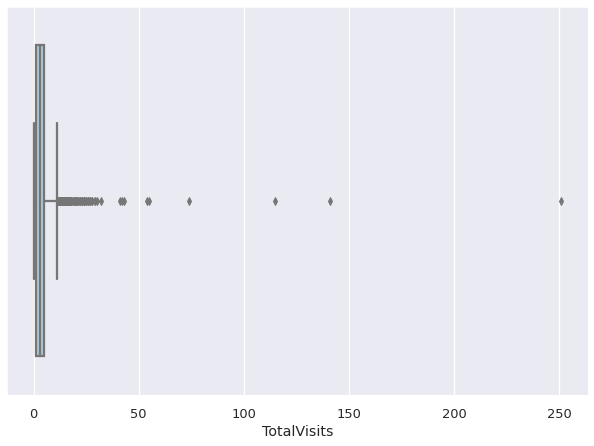

TotalVisits [ 0. 10.] 




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


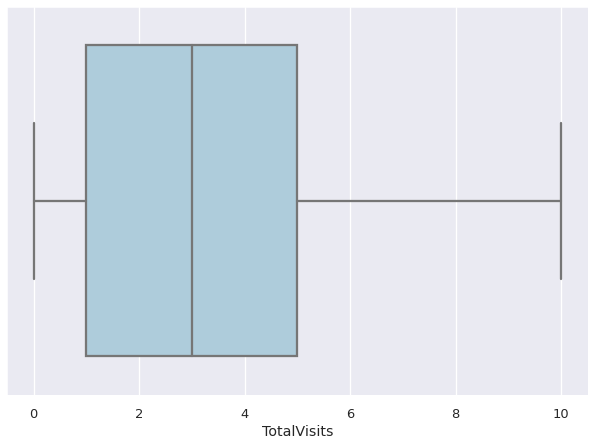

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


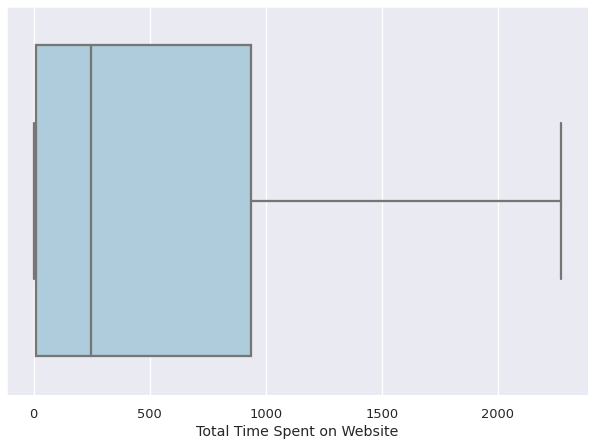

Total Time Spent on Website [   0. 1562.] 




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


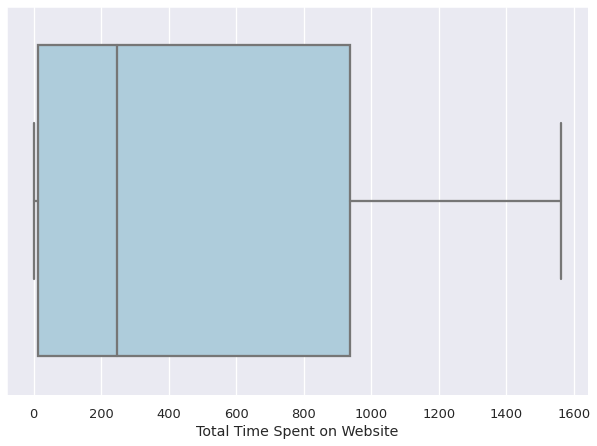

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


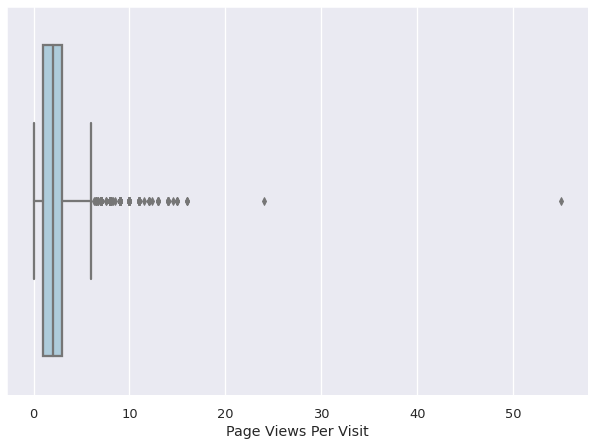

Page Views Per Visit [0. 6.] 




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


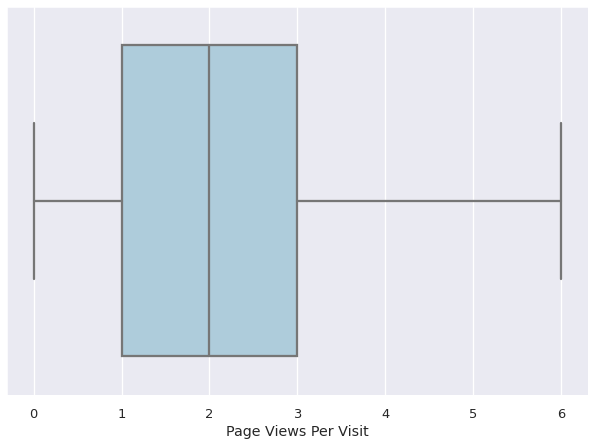

In [ ]:
# Address outliers in quant varianbles 
for i in ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']:
  sns.boxplot(df[i])
  plt.show()
  quantiles = df[i].quantile([0.05,0.95]).values
  print(i,quantiles,'\n\n')
  df[i][df[i] <= quantiles[0]] = quantiles[0]
  df[i][df[i] >= quantiles[1]] = quantiles[1]
  sns.boxplot(df[i])
  plt.show()

#**Balance of Target**

In [ ]:
# Data is Unbalanced
y.describe()

count    9240.000000
mean        0.385390
std         0.486714
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Converted, dtype: float64

##*Undersampling*

In [ ]:
# Undersample Converted = 0

import imblearn
from imblearn.under_sampling import NearMiss

# Undersampling tool has three versions. See https://imbalanced-learn.org/stable/under_sampling.html
# - version 1: "NearMiss-1" selects the positive samples for which the average distance to the N closest samples of the negative class is the smallest.
# - version 2: "NearMiss-2" selects the positive samples for which the average distance to the N farthest samples of the negative class is the smallest.
# - version 3: "NearMiss-3" is a 2-steps algorithm. First, for each negative sample, their M nearest-neighbors will be kept. 
#              Then, the positive samples selected are the one for which the average distance to the N nearest-neighbors is the largest.

undersample = NearMiss(version=1, n_neighbors=5)

# transform the dataset
X_undersample, y_undersample = undersample.fit_resample(X, y)

print("Shape before undersampling: ", X.shape, y.shape, "\n")
print("Shape after undersampling: ", X_undersample.shape, y_undersample.shape, "\n")

Shape before undersampling:  (9240, 71) (9240,) 

Shape after undersampling:  (7122, 71) (7122,) 



##*Oversampling (SMOTE)*

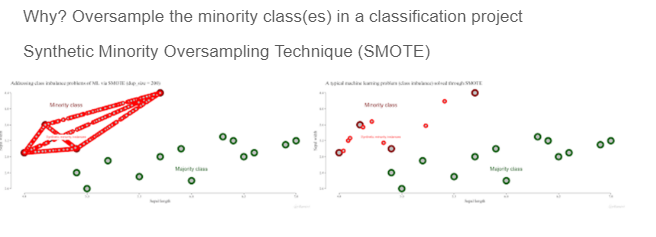

In [ ]:
# SMOTE (oversampling)
# Data is unbalanced (38.54% converted instances)

import imblearn
print("imblearn version: ", imblearn.__version__)

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=12346)
X_SMOTE, y_SMOTE = sm.fit_resample(X, y)

print("Shape before SMOTE: ", X.shape, y.shape, "\n")
print("Shape after SMOTE: ", X_SMOTE.shape, y_SMOTE.shape, "\n")

imblearn version:  0.8.1
Shape before SMOTE:  (9240, 71) (9240,) 

Shape after SMOTE:  (11358, 71) (11358,) 



#**Strength of Predictors**

##*Principal Components Analysis (PCA)*

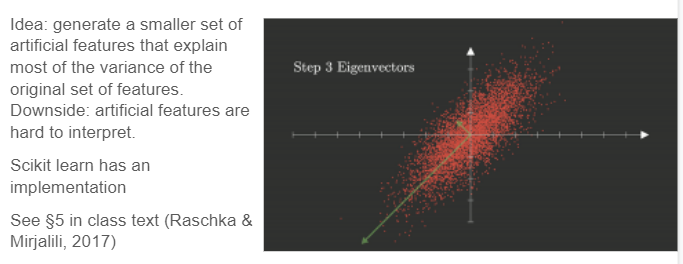

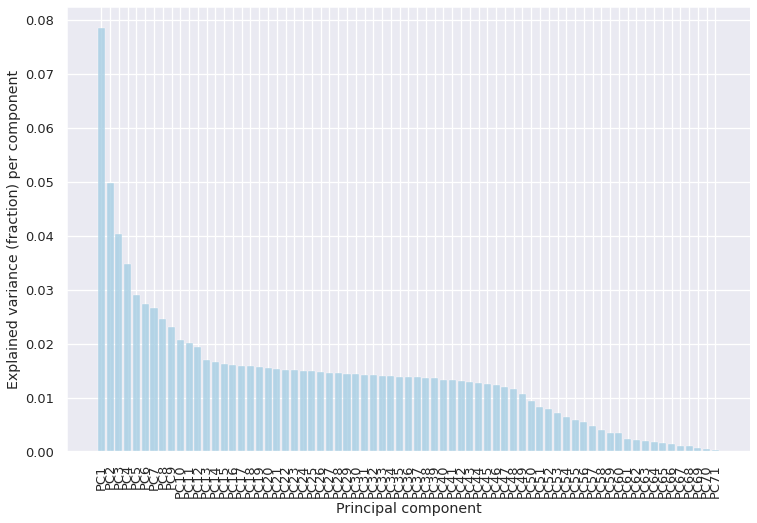

In [ ]:
# PCA
from sklearn.decomposition import PCA

# Standardization z-score  (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)
# from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()  
X_SMOTE_std = stdsc.fit_transform(X_SMOTE)

pca = PCA()
X_SMOTE_pca = pca.fit_transform(X_SMOTE_std)
pca.explained_variance_ratio_

pca_explained_variance_bar(pca, alpha=0.8)
plt.show()

X_SMOTE_pca = pd.DataFrame(X_SMOTE_pca)
X_SMOTE_pca.columns = col_names

In [ ]:
# Evaluate random forest algorithm using first five principal components
model = RandomForestClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_SMOTE_pca.iloc[:,0:5], y_SMOTE, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.897 (0.007)


##*Recursive Feature Elimination (RFE)*
Fits a specified classifier or regressor repeatedly to eliminate features until a desired (hopefully optimal) number of features remain. It is therefore a dimensionality reduction technique.
Two main parameters: the algorithm to use, and the desired number of features 


In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=10)
_ = rfe.fit(X_SMOTE_std,y_SMOTE)
print('Important Features\n',X.columns[rfe.support_])
rf = RandomForestClassifier()
_ = rf.fit(rfe.transform(X_SMOTE_std), y_SMOTE)
print("\n Accuracy: ",rf.score(rfe.transform(X_SMOTE_std), y_SMOTE))

Important Features
 Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Lead Quality_Not Sure',
       'Lead Quality_Worst', 'Last Notable Activity_Modified',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

 Accuracy:  0.9768445148793802


#**Conclusions**

*   No duplicates.
*   Resolved missing values by deleting features with a high number of NaNs, features with an highly dominant value, and by using median imputation for features with a small number of missing values.
*   Resolved missing values in the 'City' feature by treating NaN's there as a special category. 
*   Consilidated infrequent values in remaining features into an "Other" category.
*   One-hot encoded categorical features.
*   Trimmed outliers (5%, 95%), and this resolved skewness concerns also.
*   Principal components analysis does not appear useful as the first component explains less than 10% of the variance, and then a multitude of components explain 1-5% of the variance.
*   The following features were identified as important using RFE: ['Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Lead Quality_Might be',
       'Lead Quality_Not Sure', 'Last Notable Activity_SMS Sent']
* Try models built using original, oversampled (SMOTE) and undersampled data

